In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv('AMZN_after_process.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.dtypes
df=df.set_index('Date')
df_stock=df.copy()
df_stock.drop(columns=['Low','Close','Volume','Middle'],axis=1)
df_stock

,High,Low,Close,Volume,Middle,Result,ADX_Level,ADX_Trend,CMF,Low/High,Close/High,Middle/High
Date,,,,,,,,,,,,
2020-01-31,0.544839,2002.270020,2008.719971,15567300,2028.994995,N,1,1,-0.056945,0.973999,0.977137,0.987000
2020-02-03,0.542925,2000.250000,2004.199951,5891700,2024.375000,Y,1,1,-0.159185,0.976446,0.978374,0.988223
2020-02-04,0.545920,2015.369995,2049.669922,5289300,2037.585022,Y,1,1,-0.122267,0.978430,0.995082,0.989215
2020-02-05,0.548894,2032.000000,2039.869995,4376200,2051.510010,N,1,1,-0.195611,0.981159,0.984959,0.990580
2020-02-06,0.544992,2024.800049,2050.229980,3183000,2040.550049,Y,1,1,-0.191664,0.984681,0.997048,0.992341
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-11,0.842813,3054.679932,3065.870117,3851600,3117.339966,N,1,-1,-0.170410,0.960591,0.964110,0.980296
2022-02-14,0.839889,3033.000000,3103.340088,4161500,3100.984986,N,0,-1,-0.142534,0.957093,0.979290,0.978547
2022-02-15,0.837549,3092.750000,3130.209961,2848500,3126.444946,Y,0,-1,-0.158721,0.978675,0.990529,0.989338


In [39]:
df=pd.read_csv('getNasdaqNews_preprocess.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.dtypes
df=df.set_index('Date')
df_news=df.copy()
df_news

,Day1ScoreMax,Day1ScoreMin,Day1ScoreMean,Day1CountAll,Day1CountPosPer,Day1CountNegPer,Day3ScoreMax,Day3ScoreMin,Day3ScoreMean,Day3CountAll,Day3CountPosPer,Day3CountNegPer
Date,,,,,,,,,,,,
2020-09-05,0.4019,-0.5719,-0.042814,0.118644,0.428571,0.285714,0.6369,-0.6249,0.052753,0.309353,0.441860,0.232558
2020-09-06,0.6597,-0.4939,0.091386,0.118644,0.428571,0.142857,0.6597,-0.6249,0.035723,0.338129,0.404255,0.234043
2020-09-07,0.6705,-0.6705,0.147060,0.084746,0.600000,0.200000,0.6705,-0.6705,0.056595,0.136691,0.473684,0.210526
2020-09-08,0.6705,-0.6808,-0.029977,0.525424,0.225806,0.354839,0.6705,-0.6808,0.010365,0.309353,0.302326,0.302326
2020-09-09,0.6369,-0.6597,0.073768,0.576271,0.294118,0.088235,0.6705,-0.6808,0.033059,0.503597,0.285714,0.214286
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-14,0.6808,-0.6705,0.055271,0.355932,0.285714,0.238095,0.6808,-0.6705,0.081123,0.215827,0.366667,0.200000
2022-02-15,0.6369,-0.4019,0.000641,0.491525,0.206897,0.241379,0.6808,-0.6705,0.050485,0.395683,0.290909,0.218182
2022-02-16,0.7548,-0.5106,0.107104,0.440678,0.423077,0.230769,0.7548,-0.6705,0.052158,0.546763,0.302632,0.236842


In [40]:
df=pd.merge(df_stock, df_news, left_index=True, right_index=True) #default is inner join
df

,High,Low,Close,Volume,Middle,Result,ADX_Level,ADX_Trend,CMF,Low/High,...,Day1ScoreMean,Day1CountAll,Day1CountPosPer,Day1CountNegPer,Day3ScoreMax,Day3ScoreMin,Day3ScoreMean,Day3CountAll,Day3CountPosPer,Day3CountNegPer
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-08,0.861591,3130.000000,3149.840088,6094200,3190.425049,Y,1,-1,0.042903,0.962825,...,-0.029977,0.525424,0.225806,0.354839,0.6705,-0.6808,0.010365,0.309353,0.302326,0.302326
2020-09-09,0.875460,3185.000000,3268.610107,5188700,3244.089966,Y,1,-1,0.054261,0.964222,...,0.073768,0.576271,0.294118,0.088235,0.6705,-0.6808,0.033059,0.503597,0.285714,0.214286
2020-09-10,0.887840,3170.550049,3175.110107,5330700,3260.219971,N,1,-1,0.032482,0.946464,...,0.140353,0.610169,0.583333,0.194444,0.8074,-0.6808,0.065658,0.726619,0.376238,0.207921
2020-09-11,0.852709,3083.979980,3116.219971,5094000,3150.660034,N,1,-1,-0.019089,0.958550,...,0.145195,0.338983,0.500000,0.200000,0.8074,-0.6597,0.116274,0.647482,0.455556,0.155556
2020-09-14,0.844771,3096.000000,3102.969971,4529600,3141.694946,N,1,-1,-0.031922,0.971328,...,0.192822,0.305085,0.555556,0.055556,0.8316,-0.3818,0.165477,0.187050,0.423077,0.038462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-11,0.842813,3054.679932,3065.870117,3851600,3117.339966,N,1,-1,-0.170410,0.960591,...,-0.110496,0.406780,0.250000,0.458333,0.8360,-0.7430,0.069421,0.553957,0.415584,0.220779
2022-02-14,0.839889,3033.000000,3103.340088,4161500,3100.984986,N,0,-1,-0.142534,0.957093,...,0.055271,0.355932,0.285714,0.238095,0.6808,-0.6705,0.081123,0.215827,0.366667,0.200000
2022-02-15,0.837549,3092.750000,3130.209961,2848500,3126.444946,Y,0,-1,-0.158721,0.978675,...,0.000641,0.491525,0.206897,0.241379,0.6808,-0.6705,0.050485,0.395683,0.290909,0.218182


In [41]:
df['Result'].value_counts()

N    189
Y    177
Name: Result, dtype: int64

In [42]:
from collections import Counter, defaultdict
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, log_loss
import xgboost as xgb

In [43]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Result'],axis=1), 
                                                    df['Result'], 
                                                    stratify = df['Result'], 
                                                    test_size = 0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(256, 23) (110, 23) (256,) (110,)


In [44]:
print("-"*10, "Distribution of output variable in Train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class N: ",int(train_distr['N'])/train_len,"Class Y: ", int(train_distr['Y'])/train_len)
print("-"*10, "Distribution of output variable in Test data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class N: ",int(test_distr['N'])/test_len, "Class Y: ",int(test_distr['Y'])/test_len)

---------- Distribution of output variable in Train data ----------
Class N:  0.515625 Class Y:  0.484375
---------- Distribution of output variable in Test data ----------
Class N:  0.5181818181818182 Class Y:  0.4818181818181818


XGBoost

In [45]:
# The best hyper-parameters are as follows:
# n_estimators = 150, max_depth = 20, eval_metric = logloss
# Training XGBClassifier with the best hyper-parameters
xgbr = xgb.XGBClassifier(verbosity = 1, n_estimators = 50, max_depth = 5, gamma=0.5,
                         objective = 'binary:logistic', eval_metric = 'logloss')
xgbr.fit(X_train, y_train)

C:\Users\YingZhou\anaconda3\envs\main_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0.5, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=1)

In [46]:
predict_y = xgbr.predict_proba(X_train)
print("n_estimators: , max_depth: , Train log loss:", log_loss(y_train, predict_y, labels=[0,1]))
predict_y = xgbr.predict_proba(X_test)
print("n_estimators: , max_depth: , Test log loss:", log_loss(y_test, predict_y, labels=[0,1]))

n_estimators: , max_depth: , Train log loss: 1.414374804993713
n_estimators: , max_depth: , Test log loss: 1.1175048403695904


In [47]:
print("Accuracy_score:", accuracy_score(y_test, xgbr.predict(X_test)))

Accuracy_score: 0.7


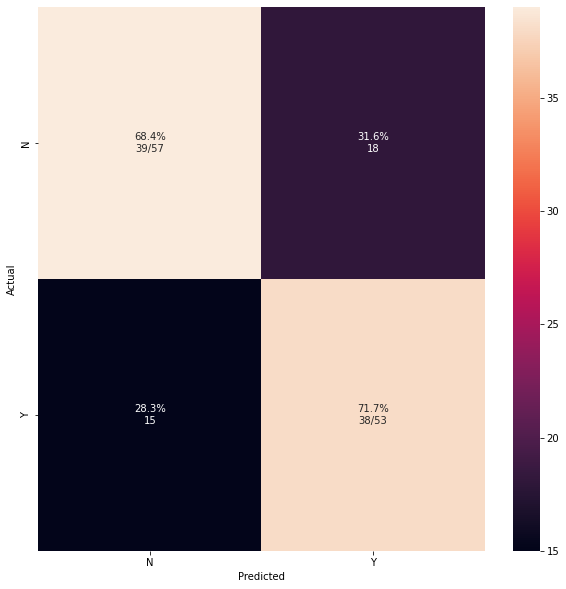

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(10,10)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    #plt.savefig(filename)
    plt.show()

cm_analysis(y_test, xgbr.predict(X_test), xgbr.classes_, ymap=None, figsize=(10,10))

Neural Network

In [53]:
df.shape

(366, 24)

In [54]:
y_train

Date
2022-01-24    N
2020-10-06    Y
2021-06-16    Y
2022-01-26    N
2021-10-19    Y
             ..
2021-11-23    N
2021-01-05    N
2021-03-12    N
2022-01-10    Y
2020-09-17    Y
Name: Result, Length: 256, dtype: object

In [55]:
y_train_new=y_train.to_list()
y_train_new=[1 if a=='Y' else 0 for a in y_train_new]
#y_train_new

In [56]:
type(X_train)

pandas.core.frame.DataFrame

In [57]:
X_train.dtypes

High               float64
Low                float64
Close              float64
Volume               int64
Middle             float64
ADX_Level            int64
ADX_Trend            int64
CMF                float64
Low/High           float64
Close/High         float64
Middle/High        float64
Day1ScoreMax       float64
Day1ScoreMin       float64
Day1ScoreMean      float64
Day1CountAll       float64
Day1CountPosPer    float64
Day1CountNegPer    float64
Day3ScoreMax       float64
Day3ScoreMin       float64
Day3ScoreMean      float64
Day3CountAll       float64
Day3CountPosPer    float64
Day3CountNegPer    float64
dtype: object

In [58]:
X_train = X_train.astype('float32')
X_train.dtypes

High               float32
Low                float32
Close              float32
Volume             float32
Middle             float32
ADX_Level          float32
ADX_Trend          float32
CMF                float32
Low/High           float32
Close/High         float32
Middle/High        float32
Day1ScoreMax       float32
Day1ScoreMin       float32
Day1ScoreMean      float32
Day1CountAll       float32
Day1CountPosPer    float32
Day1CountNegPer    float32
Day3ScoreMax       float32
Day3ScoreMin       float32
Day3ScoreMean      float32
Day3CountAll       float32
Day3CountPosPer    float32
Day3CountNegPer    float32
dtype: object

In [59]:
X_train.values.tolist()[0:2]

[[0.7683112621307373,
  2707.0400390625,
  2890.8798828125,
  7781200.0,
  2802.969970703125,
  1.0,
  -1.0,
  -0.1650003343820572,
  0.9338163137435913,
  0.9972334504127502,
  0.9669081568717957,
  0.7002999782562256,
  -0.4018999934196472,
  0.13920967280864716,
  0.5254237055778503,
  0.3870967626571655,
  0.12903225421905518,
  0.7002999782562256,
  -0.44040000438690186,
  0.1128888875246048,
  0.32374101877212524,
  0.4000000059604645,
  0.17777778208255768],
 [0.8433428406715393,
  3090.0,
  3099.9599609375,
  5086900.0,
  3136.0,
  -1.0,
  -1.0,
  -0.06498333066701889,
  0.9710873961448669,
  0.9742174744606018,
  0.9855436682701111,
  0.8518999814987183,
  -0.525600016117096,
  0.0463416650891304,
  0.4067796468734741,
  0.3333333432674408,
  0.2916666567325592,
  0.8518999814987183,
  -0.7350999712944031,
  0.07725200057029724,
  0.35971224308013916,
  0.36000001430511475,
  0.2800000011920929]]

In [60]:
type(X_train.values.tolist())

list

In [61]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
network = models.Sequential()
network.add(layers.Dense(23, activation='relu', input_dim=23))
network.add(layers.Dense(23, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))
network.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [62]:
network.fit(X_train.values.tolist(), y_train_new, epochs=5, batch_size=128)

Epoch 1/5
2/2 [==============================] - 0s 2ms/step - loss: 12531.3262 - accuracy: 0.5156
Epoch 2/5
2/2 [==============================] - 0s 3ms/step - loss: 16846.1777 - accuracy: 0.4844
Epoch 3/5
2/2 [==============================] - 0s 2ms/step - loss: 12198.6553 - accuracy: 0.4844
Epoch 4/5
2/2 [==============================] - 0s 2ms/step - loss: 3086.9985 - accuracy: 0.5156
Epoch 5/5
2/2 [==============================] - 0s 3ms/step - loss: 4465.8530 - accuracy: 0.5156


In [63]:
y_test_new=y_test.to_list()
y_test_new=[1 if a=='Y' else 0 for a in y_test_new]
y_test_new
X_test = X_test.astype('float32')
X_test.dtypes

High               float32
Low                float32
Close              float32
Volume             float32
Middle             float32
ADX_Level          float32
ADX_Trend          float32
CMF                float32
Low/High           float32
Close/High         float32
Middle/High        float32
Day1ScoreMax       float32
Day1ScoreMin       float32
Day1ScoreMean      float32
Day1CountAll       float32
Day1CountPosPer    float32
Day1CountNegPer    float32
Day3ScoreMax       float32
Day3ScoreMin       float32
Day3ScoreMean      float32
Day3CountAll       float32
Day3CountPosPer    float32
Day3CountNegPer    float32
dtype: object

In [64]:
test_loss, test_acc = network.evaluate(X_test.values.tolist(), y_test_new)
print('test_acc:', test_acc, 'test_loss', test_loss)

4/4 [==============================] - 0s 1ms/step - loss: 1425.1642 - accuracy: 0.4818
test_acc: 0.48181816935539246 test_loss 1425.1641845703125
